In [71]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [72]:
data=[
    [0.067732,3.176513],[0.427810,3.816464],[0.995731,4.550095],[0.738336,4.256571],[0.981083,4.560815],
    [0.526171,3.929515],[0.378887,3.526170],[0.033859,3.156393],[0.132791,3.110301],[0.138306,3.149813],
    [0.247809,3.476346],[0.648270,4.119688],[0.731209,4.282233],[0.236833,3.486582],[0.969788,4.655492],
    [0.607492,3.965162],[0.358622,3.514900],[0.147846,3.125947],[0.637820,4.094115],[0.230372,3.476039],
    [0.070237,3.210610],[0.067154,3.190612],[0.925577,4.631504],[0.717733,4.295890],[0.015371,3.085028],
    [0.335070,3.448080],[0.040486,3.167440],[0.212575,3.364266],[0.617218,3.993482],[0.541196,3.891471]
]

In [73]:
dataMat = np.array(data)
X = dataMat[:,0:1]   # 变量x
y = dataMat[:,1]   #变量y

In [74]:
model = Sequential()
model.add(Dense(input_dim=1, units=1))

In [75]:
model.compile(loss='mse', optimizer='sgd')

In [76]:
print('Training -----------')
for step in range(501):
    cost = model.train_on_batch(X, y)
    if step % 50 == 0:
        print("After %d trainings, the cost: %f" % (step, cost))

Training -----------
After 0 trainings, the cost: 10.858097
After 50 trainings, the cost: 0.999009
After 100 trainings, the cost: 0.121070
After 150 trainings, the cost: 0.039254
After 200 trainings, the cost: 0.028553
After 250 trainings, the cost: 0.024668
After 300 trainings, the cost: 0.021825
After 350 trainings, the cost: 0.019449
After 400 trainings, the cost: 0.017432
After 450 trainings, the cost: 0.015717
After 500 trainings, the cost: 0.014258


In [77]:
print('\nTesting ------------')
cost = model.evaluate(X, y, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
1/1 [==============================] - 0s 38ms/step - loss: 0.0142
test cost: 0.014231125824153423
Weights= [[1.9213194]] 
biases= [2.8942468]


1/1 [==============================] - 0s 20ms/step


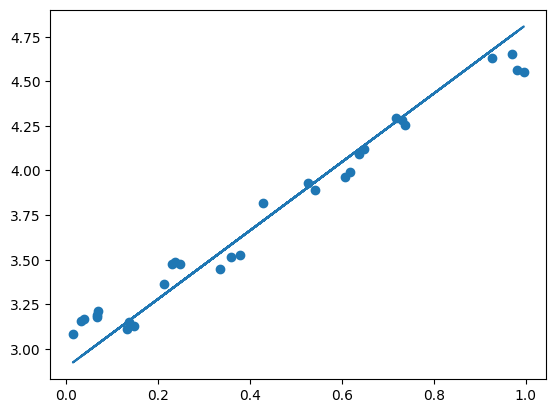

In [78]:
Y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, Y_pred)
plt.show()

In [81]:
model.save("model.h5")
tf.saved_model(model)

TypeError: 'module' object is not callable

In [80]:
from keras.models import load_model
import tensorflow as tf
from tensorflow.python.framework import graph_io
from keras import backend as K

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def, output_names, freeze_var_names)
    return frozen_graph

K.set_learning_phase(0)
keras_model = load_model('./model.h5')
print('Inputs are:', keras_model.inputs)
print('Outputs are:', keras_model.outputs)

frozen_graph = freeze_session(K.get_session(), output_names=[out.op.name for out in model.outputs])
graph_io.write_graph(frozen_graph, "./", "model/frozen_model.pb", as_text=False)

Inputs are: [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_8_input')>]
Outputs are: [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_8')>]


/home/ubuntu/miniconda3/envs/tf-example-dev/lib/python3.8/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
2023-05-02 14:30:09.424875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-02 14:30:09.425018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-02 14:30:09.425075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA 

TypeError: Keras symbolic inputs/outputs do not implement `op`. You may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model.